In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avito-demand-prediction/periods_train.csv
/kaggle/input/avito-demand-prediction/train_jpg_0.zip
/kaggle/input/avito-demand-prediction/sample_submission.csv
/kaggle/input/avito-demand-prediction/train_jpg_3.zip
/kaggle/input/avito-demand-prediction/train_jpg_4.zip
/kaggle/input/avito-demand-prediction/train_active.csv
/kaggle/input/avito-demand-prediction/test_active.csv
/kaggle/input/avito-demand-prediction/train_jpg_2.zip
/kaggle/input/avito-demand-prediction/train_jpg_1.zip
/kaggle/input/avito-demand-prediction/train.csv
/kaggle/input/avito-demand-prediction/test.csv
/kaggle/input/avito-demand-prediction/periods_test.csv
/kaggle/input/avito-demand-prediction/test_jpg.zip
/kaggle/input/avito-demand-prediction/train_jpg.zip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# 1. EDA

In [3]:
train_df = pd.read_csv("/kaggle/input/avito-demand-prediction/train.csv", parse_dates=["activation_date"])
test_df = pd.read_csv("/kaggle/input/avito-demand-prediction/test.csv", parse_dates=["activation_date"])
print("Train file rows and columns are : ", train_df.shape)
print("Test file rows and columns are : ", test_df.shape)

Train file rows and columns are :  (1503424, 18)
Test file rows and columns are :  (508438, 17)


In [4]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


#### 1.1 Deal Probablity Distributions

<Figure size 864x576 with 0 Axes>

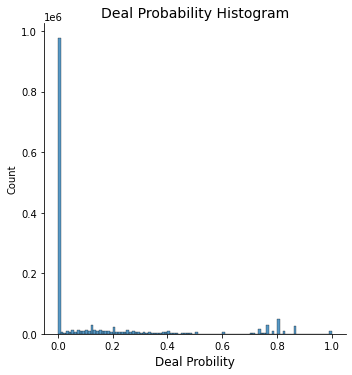

In [5]:
# Let see how the probablities are distributed with Deal_Probablity on a Histogram plot
plt.figure(figsize=(12,8))
sns.displot(train_df["deal_probability"].values, bins=100, kde=False)
plt.xlabel('Deal Probility', fontsize=12)
plt.title("Deal Probability Histogram", fontsize=14)
plt.show()

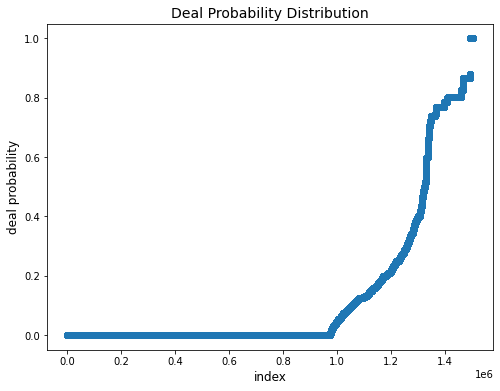

In [6]:
# Let see how the probablities are distributed with Deal_Probablity on a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['deal_probability'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('deal probability', fontsize=12)
plt.title("Deal Probability Distribution", fontsize=14)
plt.show()

<b>From Above plots, Its clear that approx 100K Ads have sold nothing, Few ads has probablity of 1 and rest are between 0 to 1.</b> 

#### 1.2 Region wise distribution of Ads:

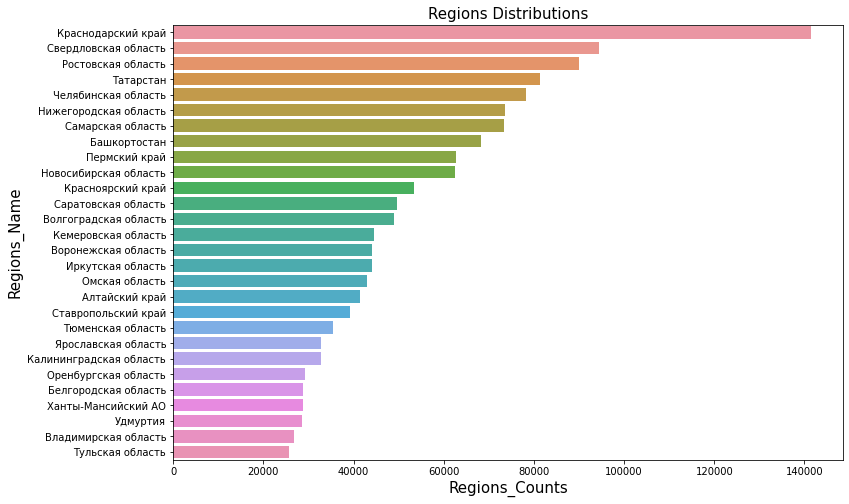

In [7]:
# Let see how the probablities are distributed with Deal_Probablity on a Histogram plot
plt.figure(figsize=(12,8))
regions =  train_df["region"].value_counts().index
sns.barplot(x=train_df["region"].value_counts(), y=regions, data=train_df)
plt.xlabel('Regions_Counts', fontsize=15)
plt.ylabel('Regions_Name', fontsize=15)
plt.title("Regions Distributions", fontsize=15)
plt.show()

**The Distributions of region with ads shows that some regions have high number of ads than other**

#### 1.3 Region wise Deal Probablity distributions

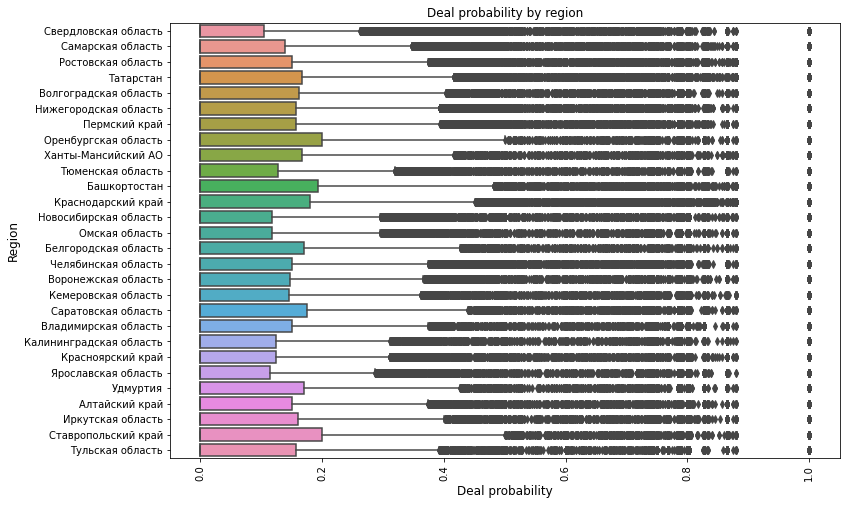

In [8]:
# Let see with region wise deal_probablity
plt.figure(figsize=(12,8))
sns.boxplot(y=train_df["region"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title("Deal probability by region")
plt.xticks(rotation='vertical')
plt.show()

**Box Plot with deal probablity shows that some region has minor advantages on probablity score**

#### 1.4 City wise distribution of Ads:

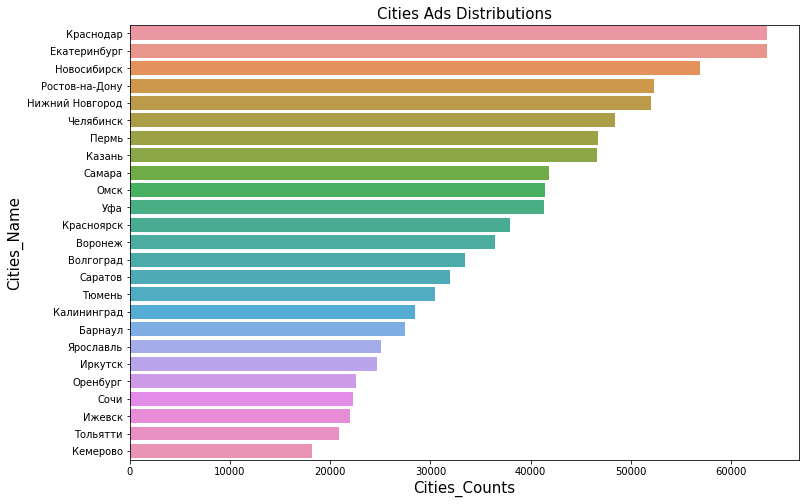

In [9]:
# Let see how th ads are distrubuted with respect to city 
plt.figure(figsize=(12,8))
cities =  train_df["city"].value_counts()[:25].index
sns.barplot(x=train_df["city"].value_counts()[:25], y=cities, data=train_df)
plt.xlabel('Cities_Counts', fontsize=15)
plt.ylabel('Cities_Name', fontsize=15)
plt.title("Cities Ads Distributions", fontsize=15)
plt.show()

**Top 25 cities ads distributions, the top cities are good cities in russia**

#### 1.5 Parent Category wise Ads Distribution

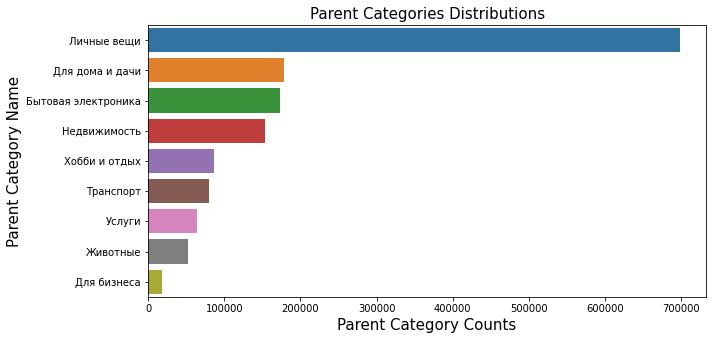

In [10]:
# Let see how how th ads are distributed with respect to parent_category
plt.figure(figsize=(10,5))
parent_cat =  train_df["parent_category_name"].value_counts().index
sns.barplot(x=train_df["parent_category_name"].value_counts(), y=parent_cat, data=train_df)
plt.xlabel('Parent Category Counts', fontsize=15)
plt.ylabel('Parent Category Name', fontsize=15)
plt.title("Parent Categories Distributions", fontsize=15)
plt.show()

**The parent category 'Personal Belongings' is highly dominated in the dataset.**

#### 1.6 Deal Probablity are Distribution with respect to the parent category name

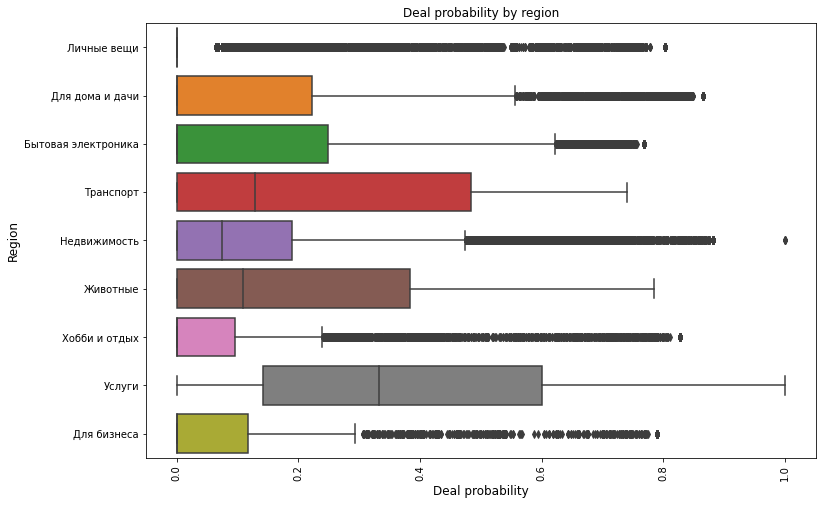

In [11]:
# Let see how the deal probablity are distributed with respect to the parent category name
plt.figure(figsize=(12,8))
sns.boxplot(y=train_df["parent_category_name"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title("Deal probability by region")
plt.xticks(rotation='vertical')
plt.show()

**The parent category 'Services' has a better deal probablity than others.**

#### 1.7 Category Name Wise distributions of Ads

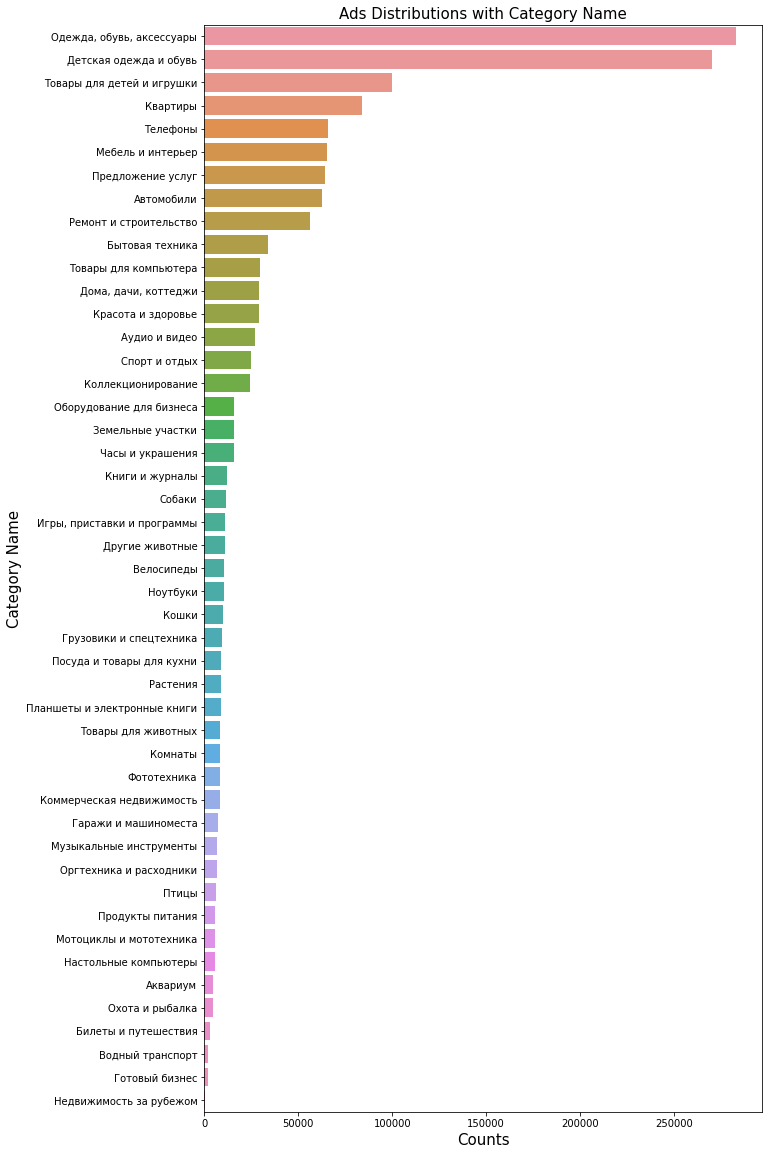

In [12]:
# Let see how how th ads are distrubuted with respect to parent_category
plt.figure(figsize=(10,20))
category_name =  train_df["category_name"].value_counts().index
sns.barplot(x=train_df["category_name"].value_counts(), y=category_name, data=train_df)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Category Name', fontsize=15)
plt.title("Ads Distributions with Category Name", fontsize=15)
plt.show()

**The distributions of ads clearly shows the domination of two category over other category. Those category are Clothes, shoes, accessories & Children's clothing and footwear**

#### 1.8 Deal Probablity distribution according to the category name

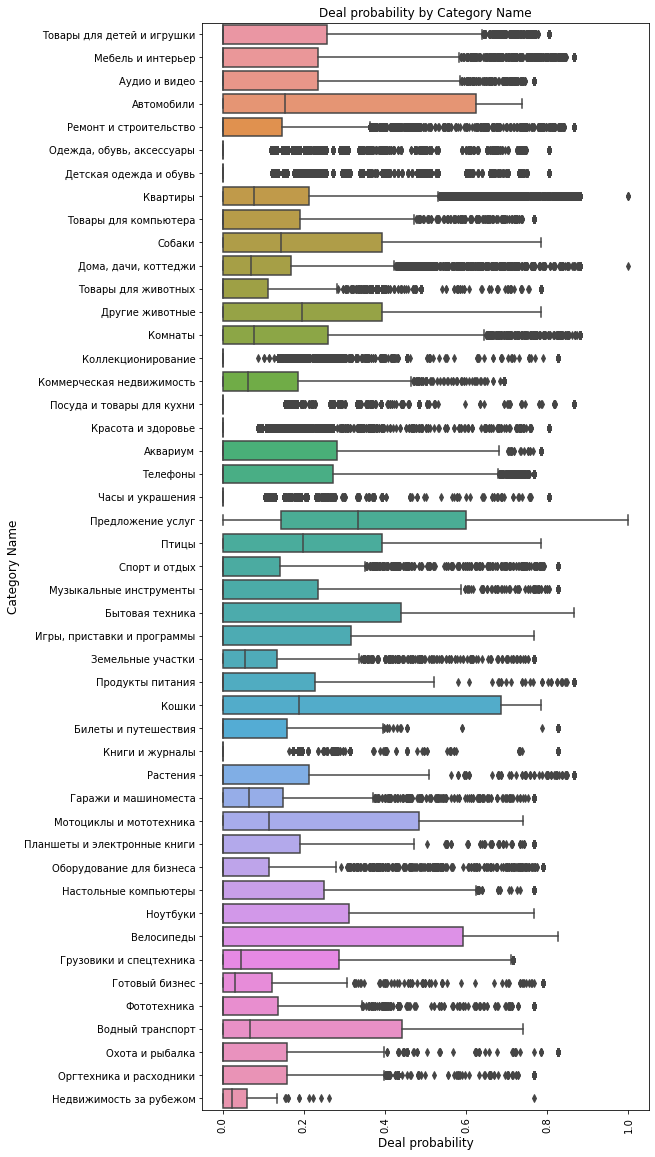

In [13]:
# Let see how the deal probablity are distributed with respect to the category name
plt.figure(figsize=(8,20))
sns.boxplot(y=train_df["category_name"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Category Name', fontsize=12)
plt.title("Deal probability by Category Name")
plt.xticks(rotation='vertical')
plt.show()

**The box plot shows that some categories are having a good deal probablity than others.**

#### 1.9 Ads Distributions by User Type 

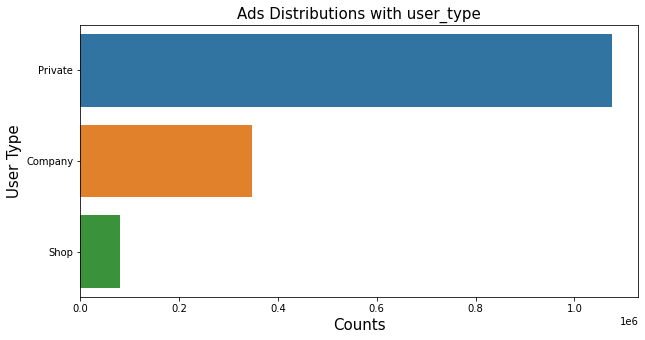

In [14]:
# Let see how how th ads are distrubuted with respect to parent_category
plt.figure(figsize=(10,5))
user_type =  train_df["user_type"].value_counts().index
sns.barplot(x=train_df["user_type"].value_counts(), y=user_type, data=train_df)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('User Type', fontsize=15)
plt.title("Ads Distributions with user_type", fontsize=15)
plt.show()

**Dataset having more private users followed by company and shops**

#### 1.10 Deal Probablity Distributions by User type

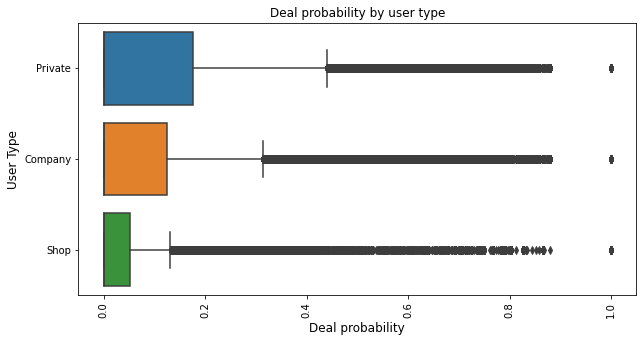

In [15]:
# Let see how the deal probablity are distributed with respect to the User Type
plt.figure(figsize=(10,5))
sns.boxplot(y=train_df["user_type"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('User Type', fontsize=12)
plt.title("Deal probability by user type")
plt.xticks(rotation='vertical')
plt.show()

#### 1.11 Distributions of Ads Price

<Figure size 1440x864 with 0 Axes>

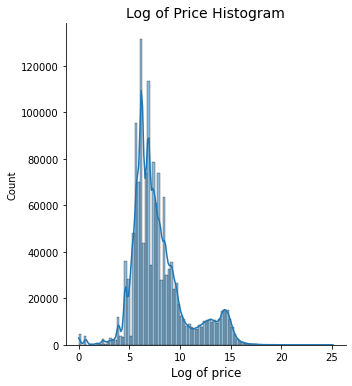

In [16]:
plt.figure(figsize=(20,12))
sns.displot(np.log1p(train_df["price"].values), bins=100, kde=True)
plt.xlabel('Log of price', fontsize=12)
plt.title("Log of Price Histogram", fontsize=14)
plt.show()

**The Log of Price shows not a fully gussian distribution**

#### 1.12 Words length in Title

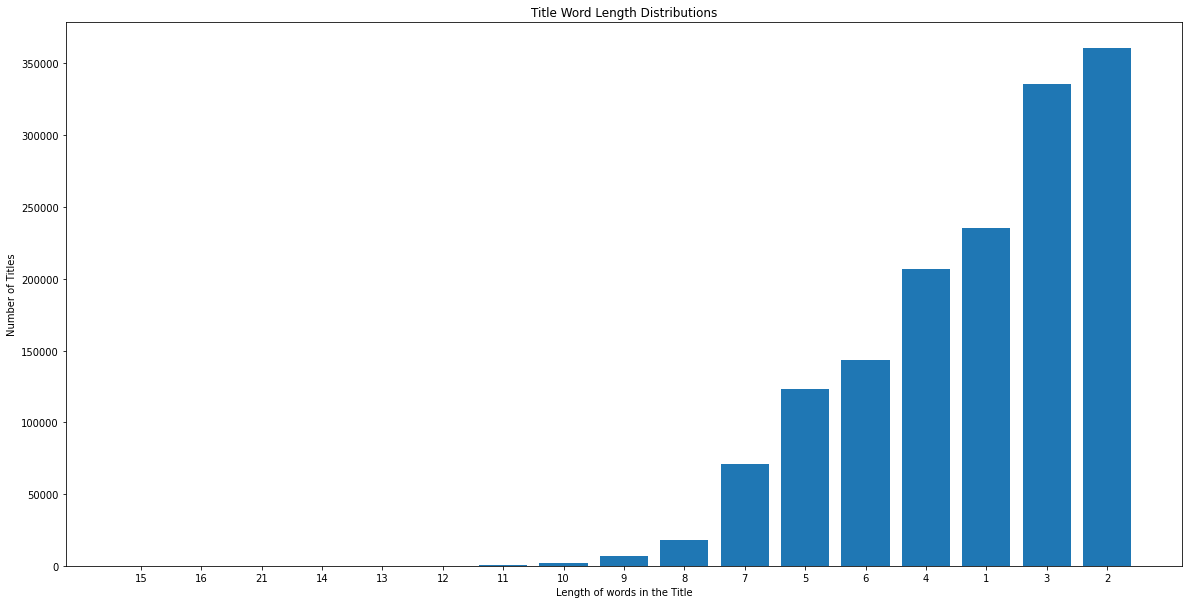

In [17]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = train_df['title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, list(word_dict.values()))

plt.xlabel('Length of words in the Title')
plt.ylabel('Number of Titles')
plt.title('Title Word Length Distributions')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**The maximum title having 1 to 6 words in their title**

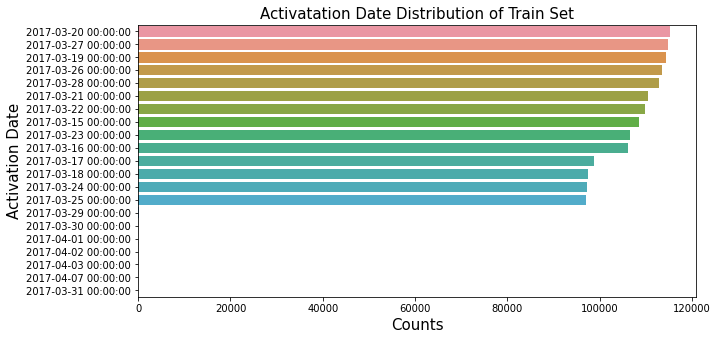

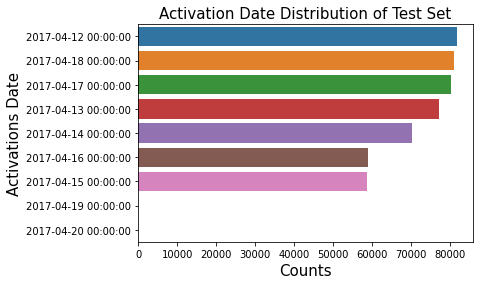

In [18]:
# Let see how how th ads are distrubuted with respect to parent_category
plt.figure(figsize=(10,5))
act_date_train =  train_df["activation_date"].value_counts().index
sns.barplot(x=train_df["activation_date"].value_counts(), y=act_date_train, data=train_df)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Activation Date', fontsize=15)
plt.title("Activatation Date Distribution of Train Set", fontsize=15)
plt.show()

act_date_test =  test_df["activation_date"].value_counts().index
sns.barplot(x=test_df["activation_date"].value_counts(), y=act_date_test, data=test_df)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Activations Date', fontsize=15)
plt.title("Activation Date Distribution of Test Set", fontsize=15)
plt.show()

**The dates are different between train and test sets.Given dataset has data for training from March 15 to March 28 and for testing April 12 to April 18, 2017. There is a gap of two weeks in between training and testing data.**